In [1]:
import os

import pandas as pd

In [2]:
data_folder = 'assignment'
unlabeled = os.path.join(data_folder, 'tweets.parquet')
labeled = os.path.join(data_folder, 'filtered.parquet')

In [3]:
def read_and_fix(path):
    df = pd.read_parquet(path, engine='pyarrow')
    # list saved as string
    df['cashtags'] = df['cashtags'].apply(lambda x: eval(eval(x[0])[0]))
    df['urls'] = df['urls'].apply(lambda x: eval(eval(x[0])[0]))
    return df

In [4]:
df_unlabeled = read_and_fix(unlabeled)
df_labeled = read_and_fix(labeled)

In [5]:
df_labeled.head()

,cashtags,clean_tweet,day,id,language,month,nlikes,nreplies,nretweets,symbol,tweet,urls,username,year
date,,,,,,,,,,,,,,
2021-07-21 20:32:25,[bac],And so it begins $BAC raises dividend 17% Yiel...,21,1417945580450496514,en,7,606,48,47,BAC,And so it begins: $BAC raises dividend 17%. ...,[],Stephanie_Link,2021
2020-10-02 12:09:26,[tsla],Tesla $TSLA Announces All-Time Record Q3 2020 ...,2,1312001743270506496,en,10,1110,30,170,TSLA,Tesla ( $TSLA ) Announces All-Time Record Q3 2...,[https://www.tesmanian.com/blogs/tesmanian-blo...,vincent13031925,2020
2021-02-27 13:47:59,[aapl],Warren Buffett turned 90 a few months ago and ...,27,1365659948378595331,en,2,962,42,108,AAPL,Warren Buffett turned 90 a few months ago and ...,[],daniel_toloko,2021
2021-01-25 18:17:06,[tsla],Tesla $TSLA South Korean Retail Investors Load...,25,1353768874127151104,en,1,631,29,73,TSLA,Tesla $TSLA South Korean Retail Investors Load...,[https://www.tesmanian.com/blogs/tesmanian-blo...,vincent13031925,2021
2021-11-12 23:06:49,[tsla],Is Elon Musk setting up the biggest bear trap ...,12,1459296654532640771,en,11,1183,90,43,TSLA,Is Elon Musk setting up the biggest bear trap ...,[],Teslaconomics,2021


In [6]:
df_labeled['cashtags'].apply(len).value_counts()

1    511
Name: cashtags, dtype: int64

In [7]:
df_unlabeled['cashtags'].apply(len).value_counts()

1    6062642
Name: cashtags, dtype: int64

In [8]:
df_labeled['urls'].apply(len).value_counts()

0    373
1    137
2      1
Name: urls, dtype: int64

In [9]:
df_unlabeled['urls'].apply(len).value_counts()

0    3575774
1    2375692
2      88584
4      18172
3       4286
5         93
6         33
7          5
8          3
Name: urls, dtype: int64

In [10]:
df_unlabeled['nlikes'].plot(kind="hist", logy=True)

<AxesSubplot:ylabel='Frequency'>

In [11]:
tweet_col = 'clean_tweet'

In [12]:
df_labeled = df_labeled[df_labeled[tweet_col].apply(len)>4]
df_unlabeled = df_unlabeled[df_unlabeled[tweet_col].apply(len)>4]

In [13]:
df_labeled = df_labeled.drop_duplicates(subset=[tweet_col])
df_unlabeled = df_unlabeled.drop_duplicates(subset=[tweet_col])

<AxesSubplot:>

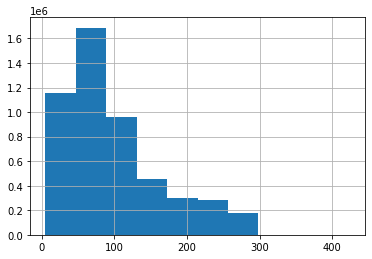

In [14]:
df_unlabeled[tweet_col].apply(len).hist()

In [26]:
import json
import urllib.request

import time

def get_yahoo_shortname(symbol):
    url=f'https://query2.finance.yahoo.com/v1/finance/search?q={symbol}'
    response = urllib.request.urlopen(url)
    content = response.read()
    data = json.loads(content.decode('utf8'))['quotes'][0]['shortname']
    return data

def get_clean_shortname(symbol):
    try:
        sn = get_yahoo_shortname(symbol)
    except:
        return ''
    drop = [', Inc.', "Inc.", ', Incorporated', ', Ltd.']
    for d in drop:
        sn = sn.replace(d, '')
    time.sleep(2) # hack
    return sn.strip()

In [27]:
get_yahoo_shortname('MSFT')

'Microsoft Corporation'

In [28]:
all_cashtags = list(df_labeled['cashtags'].apply(lambda x: x[0]).unique()) + list(df_unlabeled['cashtags'].apply(lambda x: x[0]).unique())

In [29]:
from tqdm import tqdm
shortname_dict = {x: get_clean_shortname(x) for x in tqdm(all_cashtags)  }



  0%|          | 0/548 [00:00<?, ?it/s]

  0%|          | 1/548 [00:02<20:16,  2.22s/it]

  0%|          | 2/548 [00:04<20:15,  2.23s/it]

  1%|          | 3/548 [00:06<20:14,  2.23s/it]

  1%|          | 4/548 [00:08<20:14,  2.23s/it]

  1%|          | 5/548 [00:11<20:25,  2.26s/it]

  1%|          | 6/548 [00:13<20:26,  2.26s/it]

  1%|▏         | 7/548 [00:15<20:36,  2.29s/it]

  1%|▏         | 8/548 [00:18<20:43,  2.30s/it]

  2%|▏         | 9/548 [00:20<20:32,  2.29s/it]

  2%|▏         | 10/548 [00:22<20:30,  2.29s/it]

  2%|▏         | 11/548 [00:25<20:29,  2.29s/it]

  2%|▏         | 12/548 [00:27<20:18,  2.27s/it]

  2%|▏         | 13/548 [00:29<20:28,  2.30s/it]

  3%|▎         | 14/548 [00:31<20:17,  2.28s/it]

  3%|▎         | 15/548 [00:34<20:13,  2.28s/it]

  3%|▎         | 16/548 [00:36<20:22,  2.30s/it]

  3%|▎         | 17/548 [00:38<20:27,  2.31s/it]

  3%|▎         | 18/548 [00:41<20:24,  2.31s/it]

  3%|▎         | 19/548 [00:43<20:15,  2.30s/it]

  4%|▎         |

In [30]:
shortname_dict

{'a': 'Aluminum Futures,Jun-2022',
 'aal': 'American Airlines Group',
 'aap': 'Advance Auto Parts',
 'aapl': 'Apple',
 'abbv': 'AbbVie',
 'abc': 'AmerisourceBergen Corporation',
 'abmd': 'ABIOMED',
 'abt': 'Abbott Laboratories',
 'acn': 'Accenture plc',
 'adbe': 'Adobe',
 'adi': 'Analog Devices',
 'adm': 'Archer-Daniels-Midland Company',
 'adp': 'Automatic Data Processing',
 'adsk': 'Autodesk',
 'aee': 'Ameren Corporation',
 'aep': 'American Electric Power Company',
 'aes': 'The AES Corporation',
 'afl': 'AFLAC Incorporated',
 'aig': 'American International Group, I',
 'aiz': 'Assurant',
 'ajg': 'Arthur J. Gallagher & Co.',
 'akam': 'Akamai Technologies',
 'alb': 'Albemarle Corporation',
 'algn': 'Align Technology',
 'alk': 'Alaska Air Group',
 'all': 'Allstate Corporation (The)',
 'alle': 'Allegion plc',
 'amat': 'Applied Materials',
 'amcr': 'Amcor plc',
 'amd': 'Advanced Micro Devices',
 'ame': 'AMETEK',
 'amgn': 'Amgen',
 'amp': 'Ameriprise Financial',
 'amt': 'American Tower Corpo

In [37]:
import re
def replace_names(tweet, cashtag, name):
    cashtag = '\$' + cashtag
    tweet = re.sub(cashtag, 'COMPANY_CASHTAG', tweet, flags=re.I)
    if name!='':
        tweet = re.sub(re.escape(name), 'COMPANY_NAME', tweet, flags=re.I)
    return tweet

In [38]:
df_labeled['company_name'] = df_labeled['cashtags'].apply(lambda x: shortname_dict[x[0]])
df_unlabeled['company_name'] = df_unlabeled['cashtags'].apply(lambda x: shortname_dict[x[0]])

In [39]:
df_labeled['tweet_cleaned'] = df_labeled.apply(lambda x: replace_names(x[tweet_col], x['cashtags'][0], x['company_name']), axis=1)
df_unlabeled['tweet_cleaned'] = df_unlabeled.apply(lambda x: replace_names(x[tweet_col], x['cashtags'][0], x['company_name']), axis=1)

  1%|          | 4/548 [25:52<58:39:11, 388.15s/it]


In [48]:
tweet_col = 'tweet_cleaned'

In [49]:
df_labeled = df_labeled.drop_duplicates(subset=[tweet_col])
df_unlabeled = df_unlabeled.drop_duplicates(subset=[tweet_col])

In [50]:
train_share = 0.8
last_train=df_labeled.reset_index()['date'].quantile(train_share)

In [51]:
df_labeled_train = df_labeled[df_labeled.index<=last_train]
df_labeled_val = df_labeled[df_labeled.index>last_train]

In [52]:
unlabeled_text = df_unlabeled[tweet_col].to_list()
labeled_train_text = df_labeled_train[tweet_col].to_list()
labeled_val_text = df_labeled_val[tweet_col].to_list()

In [53]:
df_labeled_train.shape, df_labeled_val.shape, df_unlabeled.shape

((388, 16), (97, 16), (4699045, 16))

In [54]:
val_idx = df_unlabeled[tweet_col].isin(set(labeled_val_text))

In [55]:
df_labeled_val.head()

,cashtags,clean_tweet,day,id,language,month,nlikes,nreplies,nretweets,symbol,tweet,urls,username,year,company_name,tweet_cleaned
date,,,,,,,,,,,,,,,,
2021-11-12 23:06:49,[tsla],Is Elon Musk setting up the biggest bear trap ...,12,1459296654532640771,en,11,1183,90,43,TSLA,Is Elon Musk setting up the biggest bear trap ...,[],Teslaconomics,2021,Tesla,Is Elon Musk setting up the biggest bear trap ...
2021-11-03 19:39:38,[tsla],It’s getting ready for a big move 🔥🚀 Pls psych...,3,1455983024521293831,en,11,220,22,19,TSLA,"It’s getting ready for a big move 🔥🚀🌕 Pls, ps...",[],ValueAnalyst1,2021,Tesla,It’s getting ready for a big move 🔥🚀 Pls psych...
2021-11-09 18:54:13,[tsla],Just sold $tsla puts bullish move 9.1 holy crap,9,1458145921863077888,en,11,474,42,13,TSLA,Just sold $tsla puts ( bullish move ) 9.1% ho...,[],pakpakchicken,2021,Tesla,Just sold COMPANY_CASHTAG puts bullish move 9....
2021-09-10 10:25:33,[fb],Zuckerberg always at least 5 years ahead of th...,10,1436274641086128131,en,9,573,66,116,FB,"Zuckerberg, always at least 5 years ahead of t...",[],trevmuchedzi,2021,Meta Platforms,Zuckerberg always at least 5 years ahead of th...
2021-08-29 08:39:36,[tsla],In number of weeks just weeks Tesla is about t...,29,1431899320559747075,en,8,692,23,55,TSLA,"In number of weeks, just weeks, Tesla is about...",[],Alpsoy66,2021,Tesla,In number of weeks just weeks COMPANY_NAME is ...


In [56]:
import torch
from transformers import AutoTokenizer, AutoModel

# model_name = "distilroberta-base"
model_name = "cardiffnlp/twitter-roberta-base-dec2021"
device = "cuda:0" if torch.cuda.is_available() else "cpu"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
model = AutoModel.from_pretrained(model_name).to(device)
model = torch.nn.DataParallel(model)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-dec2021 were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-dec2021 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predi

In [57]:
from tqdm import trange

@torch.no_grad()
def get_embeddings(texts, batch_size=128):
    mean_embedding, max_embedding = [], []
    for i in trange(0,len(texts), batch_size):
        encoded_input = tokenizer(texts[i:i+batch_size], return_tensors='pt',padding=True,truncation=True).to(device)
        output = model(**encoded_input)
        mean_embedding.append(output.last_hidden_state.mean(-2).cpu())
        max_embedding.append(output.last_hidden_state.max(-2)[0].cpu())
    return torch.cat(mean_embedding,dim=0), torch.cat(max_embedding,dim=0)

In [58]:
labeled_train_mean_emb, labeled_train_max_emb = get_embeddings(labeled_train_text, batch_size=2048)

100%|██████████| 1/1 [00:13<00:00, 13.60s/it]


In [59]:
unlabeled_mean_emb, unlabeled_max_emb = get_embeddings(unlabeled_text, batch_size=2048)

100%|██████████| 2295/2295 [34:40<00:00,  1.10it/s]


In [122]:
labeled_train_emb, unlabeled_emb = labeled_train_max_emb, unlabeled_max_emb
# labeled_train_emb, unlabeled_emb = labeled_train_mean_emb, unlabeled_mean_emb

In [123]:
def sim_matrix(a, b, eps=1e-8):
    """
    added eps for numerical stability
    """
    a_n, b_n = a.norm(dim=1)[:, None], b.norm(dim=1)[:, None]
    a_norm = a / torch.max(a_n, eps * torch.ones_like(a_n))
    b_norm = b / torch.max(b_n, eps * torch.ones_like(b_n))
    sim_mt = torch.mm(a_norm, b_norm.transpose(0, 1))
    return -sim_mt

# distances = torch.cdist(labeled_train_emb.unsqueeze(0), unlabeled_emb.unsqueeze(0)).squeeze()
distances = sim_matrix(labeled_train_emb, unlabeled_emb)

In [124]:
k=5
closest, indices = torch.kthvalue(distances, k, dim=0)
#closest, parent = distances.min(dim=0)

In [125]:
df_unlabeled['closest_embedding'] = closest.cpu().numpy()

In [126]:
df_val = df_unlabeled[val_idx]

In [127]:
def get_recall(df_unlabeled, val_idx):
    num_pos = 10000
    thres = df_unlabeled['closest_embedding'].quantile(num_pos/len(df_unlabeled))
    chosen = len(df_val[df_val['closest_embedding']<=thres])
    tot = len(df_val)
    print(chosen,tot,thres)
    return chosen/tot

In [128]:
# mean pool, twitter-roberta, l2 dist, clean_tweet -- 6/112
# mean pool, twitter-roberta, cosine dist, clean_tweet -- 6/112
# mean pool, roberta, l2 dist, clean_tweet -- 4/112
# mean pool, roberta, cosine dist, clean_tweet -- 0/112

In [129]:
print(get_recall(df_unlabeled, val_idx))

5 97 -0.9798167349176462
0.05154639175257732


In [130]:
pd.set_option('display.max_rows', 500)

<AxesSubplot:>

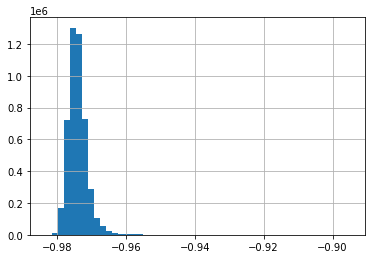

In [131]:
#df_unlabeled[df_unlabeled['closest_embedding']<-0.996]['closest_embedding'].hist()
df_unlabeled['closest_embedding'].hist(bins=50)

In [132]:
df_val = df_unlabeled[val_idx]

<AxesSubplot:>

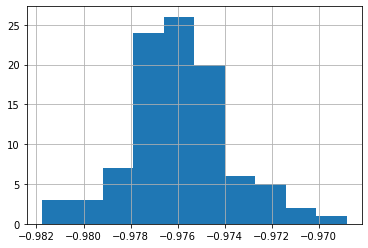

In [133]:
df_val['closest_embedding'].hist()

In [134]:
df_val['closest_embedding'].min()

-0.981758

In [135]:
thres = df_unlabeled['closest_embedding'].quantile(200000/len(df_unlabeled))

In [136]:
thres

-0.9779153491593504

In [137]:
df_val[df_val['closest_embedding']<=thres]

,cashtags,clean_tweet,day,id,language,month,nlikes,nreplies,nretweets,symbol,tweet,urls,username,year,company_name,tweet_cleaned,closest_embedding
date,,,,,,,,,,,,,,,,,
2020-07-25 16:55:25,[tsla],So true $tsla,25,1287068951453687808,en,7,2,0,0,TSLA,So true @Teslaconomics $tsla https://t.co/q...,[https://youtu.be/y1KNmKKAtWY],CalvinC98304780,2020,Tesla,So true COMPANY_CASHTAG,-0.980113
2021-10-08 15:42:22,[tsla],BREAKING Canaccord Genuity analyst Jed Dorshei...,8,1446501228012314649,en,10,595,16,85,TSLA,BREAKING: Canaccord Genuity analyst Jed Dorshe...,[],SawyerMerritt,2021,Tesla,BREAKING Canaccord Genuity analyst Jed Dorshei...,-0.978855
2021-11-07 23:53:24,[tsla],NEWS Wedbush analyst Daniel Ives reiterated an...,7,1457496439651766273,en,11,49,1,5,TSLA,NEWS: Wedbush analyst Daniel Ives reiterated a...,[],TeslaOwnersDE,2021,Tesla,NEWS Wedbush analyst Daniel Ives reiterated an...,-0.981662
2021-10-28 22:43:21,[tsla],"NEWS Gary Black raises his $TSLA PT to $1,400 ...",28,1453854929416753158,en,10,1108,13,78,TSLA,"NEWS: Gary Black raises his $TSLA PT to $1,400...",[],TeslaOwnersDE,2021,Tesla,NEWS Gary Black raises his COMPANY_CASHTAG PT ...,-0.981068
2021-10-25 16:51:51,[tsla],Chart of the day $TSLA market cap tops $1 Tril...,25,1452679307629940747,en,10,276,24,52,TSLA,Chart of the day: $TSLA market cap tops $1 Tri...,[],Lebeaucarnews,2021,Tesla,Chart of the day COMPANY_CASHTAG market cap to...,-0.978821
2021-10-25 16:44:24,[tsla],#Tesla crosses $1 trillion dollar #marketcap f...,25,1452677433170305034,en,10,593,18,89,TSLA,#Tesla crosses $1 trillion dollar #marketcap f...,[],SusanLiTV,2021,Tesla,#COMPANY_NAME crosses $1 trillion dollar #mark...,-0.981758
2021-10-22 18:19:34,[etn],$ETN will explode soon,22,1451614222035607557,en,10,210,28,39,ETN,$ETN will explode soon 🚀 https://t.co/23PhTTXxZC,[],CryptoBull2020,2021,"Eaton Corporation, PLC",COMPANY_CASHTAG will explode soon,-0.978011
2021-10-05 16:27:07,[tsla],This is how extreme $TSLA investor rolls,5,1445425327933517824,en,10,575,25,13,TSLA,This is how extreme $TSLA investor rolls http...,[],vincent13031925,2021,Tesla,This is how extreme COMPANY_CASHTAG investor r...,-0.978111
2021-10-28 19:30:02,[fb],I’m not as bullish on the Facebook (meta platf...,28,1453806279487541256,en,10,448,17,52,FB,I’m not as bullish on the Facebook (meta) plat...,[],MoonOverlord,2021,Meta Platforms,I’m not as bullish on the Facebook (meta platf...,-0.978695


In [138]:
df_val.sort_values('closest_embedding')

,cashtags,clean_tweet,day,id,language,month,nlikes,nreplies,nretweets,symbol,tweet,urls,username,year,company_name,tweet_cleaned,closest_embedding
date,,,,,,,,,,,,,,,,,
2021-10-25 16:44:24,[tsla],#Tesla crosses $1 trillion dollar #marketcap f...,25,1452677433170305034,en,10,593,18,89,TSLA,#Tesla crosses $1 trillion dollar #marketcap f...,[],SusanLiTV,2021,Tesla,#COMPANY_NAME crosses $1 trillion dollar #mark...,-0.981758
2021-11-07 23:53:24,[tsla],NEWS Wedbush analyst Daniel Ives reiterated an...,7,1457496439651766273,en,11,49,1,5,TSLA,NEWS: Wedbush analyst Daniel Ives reiterated a...,[],TeslaOwnersDE,2021,Tesla,NEWS Wedbush analyst Daniel Ives reiterated an...,-0.981662
2021-10-28 22:43:21,[tsla],"NEWS Gary Black raises his $TSLA PT to $1,400 ...",28,1453854929416753158,en,10,1108,13,78,TSLA,"NEWS: Gary Black raises his $TSLA PT to $1,400...",[],TeslaOwnersDE,2021,Tesla,NEWS Gary Black raises his COMPANY_CASHTAG PT ...,-0.981068
2021-11-10 15:06:17,[tsla],BREAKING BofA Securities analyst John Murphy r...,10,1458450947269664776,en,11,684,11,69,TSLA,BREAKING: BofA Securities analyst John Murphy ...,[],SawyerMerritt,2021,Tesla,BREAKING BofA Securities analyst John Murphy r...,-0.980361
2020-07-25 16:55:25,[tsla],So true $tsla,25,1287068951453687808,en,7,2,0,0,TSLA,So true @Teslaconomics $tsla https://t.co/q...,[https://youtu.be/y1KNmKKAtWY],CalvinC98304780,2020,Tesla,So true COMPANY_CASHTAG,-0.980113
2021-08-20 02:23:52,[tsla],Tesla announcing revolutionary robot technolog...,20,1428543275347099654,en,8,612,31,25,TSLA,Tesla announcing revolutionary robot technolog...,[],jchybow,2021,Tesla,COMPANY_NAME announcing revolutionary robot te...,-0.979692
2021-11-01 17:18:56,[tsla],BREAKING $TSLA price target raised to $250 Sto...,1,1455222842027651081,en,11,697,30,40,TSLA,BREAKING: $TSLA price target raised to $250 S...,[],NorthmanTrader,2021,Tesla,BREAKING COMPANY_CASHTAG price target raised t...,-0.979127
2021-10-08 15:42:22,[tsla],BREAKING Canaccord Genuity analyst Jed Dorshei...,8,1446501228012314649,en,10,595,16,85,TSLA,BREAKING: Canaccord Genuity analyst Jed Dorshe...,[],SawyerMerritt,2021,Tesla,BREAKING Canaccord Genuity analyst Jed Dorshei...,-0.978855
2021-10-25 16:51:51,[tsla],Chart of the day $TSLA market cap tops $1 Tril...,25,1452679307629940747,en,10,276,24,52,TSLA,Chart of the day: $TSLA market cap tops $1 Tri...,[],Lebeaucarnews,2021,Tesla,Chart of the day COMPANY_CASHTAG market cap to...,-0.978821


In [145]:
df_unlabeled[df_unlabeled['closest_embedding']<=-0.9775].shape

(314672, 17)

In [ ]:
df_unlabeled[df_unlabeled['closest_embedding']<10.].sort_values('closest_embedding').head(500)

In [146]:
df_unlabeled[df_unlabeled['closest_embedding']<=-0.9775].cashtags.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[tsla]    84757
[aapl]    17871
[tel]     10584
[amzn]     7563
[twtr]     6781
          ...  
[iff]        21
[cinf]       20
[wrb]        18
[fbhs]       14
[bbwi]       12
Name: cashtags, Length: 505, dtype: int64

In [ ]:
df_unlabeled.cashtags.value_counts()

In [151]:
df_unlabeled['original_val'] = 0
df_unlabeled.loc[val_idx,'original_val'] = 1

In [162]:
like_thres=10
cond = df_unlabeled['nlikes']>like_thres
df_liked=df_unlabeled[cond]
thres_pos = df_liked['closest_embedding'].quantile(10000/len(df_liked))
thres_neg = df_liked['closest_embedding'].quantile(1-10000/len(df_liked))
df_unlabeled['label_knn'] = -1
df_unlabeled.loc[cond&(df_unlabeled['closest_embedding']<thres_pos) & ~val_idx,'label_knn'] = 1
df_unlabeled.loc[cond&(df_unlabeled['closest_embedding']>thres_neg) & ~val_idx,'label_knn'] = 0

In [163]:
df_unlabeled[df_unlabeled['label_knn'] == 1].sort_values('closest_embedding')

,cashtags,clean_tweet,day,id,language,month,nlikes,nreplies,nretweets,symbol,tweet,urls,username,year,company_name,tweet_cleaned,closest_embedding,label_knn,original_val
date,,,,,,,,,,,,,,,,,,,
2020-12-11 01:21:06,[tsla],NEWS Jefferies analyst Philippe Houchois downg...,11,1337205735328010240,en,12,321,57,17,TSLA,NEWS: Jefferies analyst Philippe Houchois down...,[],SawyerMerritt,2020,Tesla,NEWS Jefferies analyst Philippe Houchois downg...,-0.982986,1,0
2021-04-01 22:33:46,[tsla],This looks important $TSLA,1,1377751067316789248,en,4,39,4,1,TSLA,This looks important. $TSLA https://t.co/PSKi...,[https://twitter.com/TheLastBearSta1/status/13...,PlainSite,2021,Tesla,This looks important COMPANY_CASHTAG,-0.982961,1,0
2020-05-22 13:13:21,[tsla],Tesla Courted by North Carolina For Next Gigaf...,22,1263820245644398593,en,5,99,11,17,TSLA,Tesla Courted by North Carolina For Next Gigaf...,[https://www.tesmanian.com/blogs/tesmanian-blo...,vincent13031925,2020,Tesla,COMPANY_NAME Courted by North Carolina For Nex...,-0.982521,1,0
2021-01-27 21:35:43,[aapl],#Breaking Apple just crossed $100 billion in r...,27,1354543635564437508,en,1,90,5,23,AAPL,#Breaking: Apple just crossed $100 billion in ...,[],scottbudman,2021,Apple,#Breaking COMPANY_NAME just crossed $100 billi...,-0.982382,1,0
2021-10-19 23:00:07,[nflx],Netflix $NFLX Q3 Earnings Almost Double on Suc...,19,1450597661023875077,en,10,24,0,5,NFLX,Netflix ( $NFLX ) Q3 Earnings Almost Double on...,[https://www.thestreet.com/investing/netflix-s...,TheStreet,2021,Netflix,COMPANY_NAME COMPANY_CASHTAG Q3 Earnings Almos...,-0.982340,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15 05:41:43,[etn],"#Electroneum are still marketing on So.. ""What...",15,1294509554357723137,en,8,30,1,3,ETN,#Electroneum are still marketing on @coingecko...,[http://etneverywhere.com],drshepard_,2020,"Eaton Corporation, PLC","#Electroneum are still marketing on So.. ""What...",-0.978482,1,0
2021-08-28 00:55:10,[mrna],With 45 gamma expiring today $MRNA was a good ...,28,1431420057612169221,en,8,12,0,2,MRNA,"With 45% gamma expiring today, $MRNA was a goo...",[],dougpless,2021,Moderna,With 45 gamma expiring today COMPANY_CASHTAG w...,-0.978482,1,0
2021-11-04 08:16:32,[tsla],Be very careful about chasing $TSLA pre-market...,4,1456173506408980482,en,11,790,63,25,TSLA,@TeslaPodcast Be very careful about chasing $T...,[],garyblack00,2021,Tesla,Be very careful about chasing COMPANY_CASHTAG ...,-0.978482,1,0


In [164]:
df_unlabeled[df_unlabeled['label_knn'] == 0]

,cashtags,clean_tweet,day,id,language,month,nlikes,nreplies,nretweets,symbol,tweet,urls,username,year,company_name,tweet_cleaned,closest_embedding,label_knn,original_val
date,,,,,,,,,,,,,,,,,,,
2021-07-21 23:03:35,[nflx],Cramer on $NFLX “If you’re debating whether a ...,21,1417983622682906626,en,7,22,4,0,NFLX,Cramer on $NFLX: “If you’re debating whether ...,[],MasaSonCap,2021,Netflix,Cramer on COMPANY_CASHTAG “If you’re debating ...,-0.967088,0,0
2020-10-02 12:03:52,[tsla],$TSLA actually did it Met expectations and act...,2,1312000343337771008,en,10,80,5,7,TSLA,$TSLA actually did it. Met expectations and ac...,[],squawksquare,2020,Tesla,COMPANY_CASHTAG actually did it Met expectatio...,-0.968283,0,0
2020-10-02 08:48:02,[tsla],Battery Day Interview Part 2 🔋🗓,2,1311951060764950528,en,10,13,0,4,TSLA,Battery Day Interview — Part 2! 🔋🗓🔋 https://t...,[https://youtu.be/9E4vpn_6Qw4],TeslaNY,2020,Tesla,Battery Day Interview Part 2 🔋🗓,-0.960948,0,0
2020-10-02 18:46:41,[aapl],Solid $AAPL win Brian 💪🔥👍👊,2,1312101715072573440,en,10,32,1,2,AAPL,Solid $AAPL win Brian! 💪🔥👍👊,[],thehonestcroock,2020,Apple,Solid COMPANY_CASHTAG win Brian 💪🔥👍👊,-0.966960,0,0
2020-09-10 13:02:58,[c],Breaking makes history by naming Jane Fraser t...,10,1304042682642243585,en,9,16,0,8,C,Breaking: @Citi makes history by naming Jane F...,[https://www.cnn.com/2020/09/10/business/citi-...,MattEganCNN,2020,Crude Oil May 22,Breaking makes history by naming Jane Fraser t...,-0.963174,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20 23:23:28,[tsla],Ah they make a cute couple don't they $TSLA,20,1428860264762552325,en,8,28,5,2,TSLA,Ah they make a cute couple don't they? $TSLA ...,[],SteveHamel16,2021,Tesla,Ah they make a cute couple don't they COMPANY_...,-0.964960,0,0
2021-08-20 21:37:31,[tsla],I wanna feel what love is I want Tesla robot t...,20,1428833600816828417,en,8,48,6,3,TSLA,I wanna feel what love is. I want Tesla robot...,[http://Tesla.com/resistanceisfutile],adamhoov,2021,Tesla,I wanna feel what love is I want COMPANY_NAME ...,-0.964479,0,0
2021-08-20 21:06:08,[tsla],How do you like this one LMAO Volkswagen ID.3 ...,20,1428825701994704897,en,8,158,25,38,TSLA,How do you like this one @stephenLweiss? LMAO ...,[https://insideevs.com/news/527874/volkswagen-...,squawksquare,2021,Tesla,How do you like this one LMAO Volkswagen ID.3 ...,-0.966768,0,0


In [166]:
df_unlabeled[df_unlabeled['label_knn'] == 0].cashtags.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[tsla]     2567
[tel]      1443
[aapl]      432
[amp]       419
[amzn]      350
[amd]       257
[fb]        207
[ba]        192
[nvda]      157
[msft]      154
[dis]       144
[etn]       143
[twtr]      140
[mrna]      113
[es]        110
[nflx]      104
[mrk]        97
[hd]         87
[bsx]        72
[wmt]        70
[pfe]        65
[googl]      58
[penn]       57
[f]          56
[stx]        51
[gm]         48
[fox]        46
[t]          44
[pypl]       43
[bax]        43
[gs]         39
[ogn]        39
[tdoc]       37
[ame]        37
[carr]       36
[dov]        36
[mcd]        36
[sbux]       34
[cost]       34
[ccl]        34
[bll]        32
[jnj]        31
[crm]        29
[etsy]       28
[gild]       28
[cvx]        27
[nke]        26
[xom]        26
[orcl]       25
[intc]       25
[cat]        24
[dal]        23
[goog]       23
[tgt]        23
[bac]        23
[aal]        23
[biib]       23
[ice]        23
[jpm]        23
[efx]        22
[ibm]        22
[qcom]       21
[viac]  

In [167]:
df_unlabeled[df_unlabeled['label_knn'] == 1].cashtags.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[tsla]     5277
[tel]      1004
[aapl]      518
[amzn]      178
[twtr]      155
[fb]        151
[amp]       136
[nflx]      131
[nvda]       94
[mrna]       94
[dis]        77
[msft]       75
[etn]        73
[pfe]        60
[amd]        55
[wmt]        52
[nrg]        52
[pypl]       51
[ogn]        48
[tdoc]       45
[stx]        43
[penn]       42
[googl]      41
[cvx]        32
[ba]         31
[nke]        30
[v]          29
[ess]        28
[gs]         28
[gild]       27
[goog]       27
[gm]         25
[xom]        24
[intc]       24
[viac]       23
[es]         23
[f]          22
[crm]        22
[t]          20
[jpm]        19
[bll]        19
[efx]        19
[oxy]        18
[ibm]        18
[sbux]       18
[bax]        17
[dfs]        17
[bsx]        17
[ice]        16
[s]          16
[mcd]        16
[ccl]        15
[jnj]        15
[adbe]       14
[now]        14
[tgt]        13
[aal]        13
[dal]        12
[mo]         12
[biib]       11
[cmg]        11
[cost]       10
[fox]   

In [ ]:
df_unlabeled[df_unlabeled['label_knn'] == 1]

In [168]:
df_unlabeled.to_parquet('knn_labeled.parquet.gzip',  compression='gzip')  